In [ ]:
# 로이터 뉴스 데이터로 다항분류
# 네트워크 구성을 4가지로 작성 후 비교 : Dense, RNN + Dense, CNN + Dense, CNN + RNN + Dense

from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, LSTM, Conv1D, GlobalMaxPooling1D, Dropout
import tensorflow as tf
from keras.utils import pad_sequences, to_categorical
import matplotlib.pyplot as plt

(x_train, y_train),(x_test, y_test) = reuters.load_data(num_words=10000)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train[0])
print(y_train[0])

# train / validation
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 문장 길이 맞추기
text_max_words = 120
# feature
x_train = pad_sequences(x_train, maxlen=text_max_words)
x_val = pad_sequences(x_val, maxlen=text_max_words)

x_test = pad_sequences(x_test, maxlen=text_max_words)
print(x_train[0], len(x_train[0]))

# label
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train[0])

2110848/2110848 [==============================] - 0s 0us/step
(8982,) (8982,) (2246,) (2246,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    1    2    2    8   43   10  447    5   25
  207  270    5 3095  111   16  369  186   90   67    7   89    5   19
  102    6   19  124   15   90   67   84   22  482   26    7   48    4
   49    8  864   39  209  154    6  151    6   83   11   15   22  155
   11   15    7   48    9 4579 1005  504    6  258    6  272   11   15
   22  134   44   11   15   16    8  197 1245  

In [ ]:
# 모델 구성 1 : 완전 연결층만 사용
model = Sequential()
model.add(Embedding(10000, 128, input_length=text_max_words))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), verbose=2)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 128)          1280000   
                                                                 
 flatten (Flatten)           (None, 15360)             0         
                                                                 
 dense (Dense)               (None, 256)               3932416   
                                                                 
 dense_1 (Dense)             (None, 46)                11822     
                                                                 
Total params: 5,224,238
Trainable params: 5,224,238
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
110/110 - 20s - loss: 1.9445 - accuracy: 0.5154 - val_loss: 1.4770 - val_accuracy: 0.6393 - 20s/epoch - 177ms/step
Epoch 2/10
110/110 - 13s - loss: 0.8705 - accur

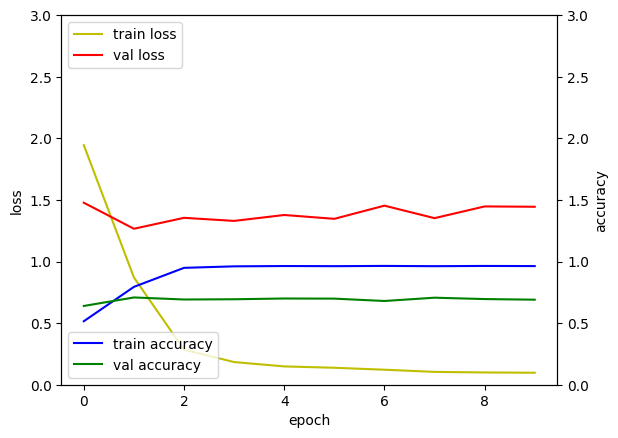

eval :  [1.484194040298462, 0.6856634020805359]


In [ ]:
def plot_func():
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()
  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
  loss_ax.set_ylim([0.0,3.0])

  acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
  acc_ax.set_ylim([0.0,3.0])

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  acc_ax.set_ylabel('accuracy')

  loss_ax.legend(loc='upper left')
  acc_ax.legend(loc='lower left')

  plt.show()

  print('eval : ', model.evaluate(x_test, y_test, batch_size=64,  verbose=0))

plot_func()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 46)                11822     
                                                                 
Total params: 1,456,430
Trainable params: 1,456,430
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
110/110 - 48s - loss: 2.4548 - accuracy: 0.3649 - val_loss: 1.9167 - val_accuracy: 0.4783 - 48s/epoch - 437ms/step
Epoch 2/10
110/110 - 56s - loss: 1.7698 - acc

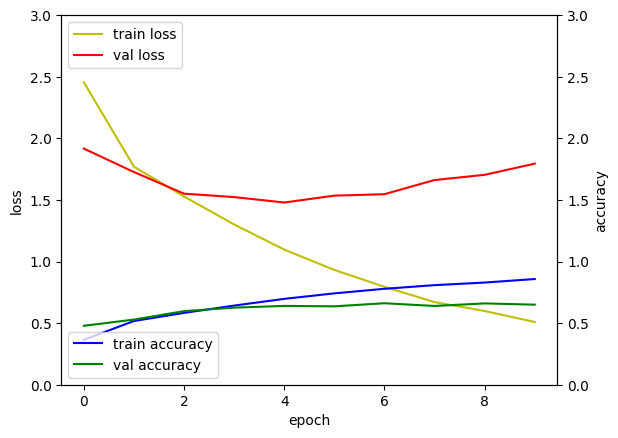

eval :  [1.484194040298462, 0.6856634020805359]


In [ ]:
# 모델 구성 2 : RNN + 완전 연결층만 사용
model2 = Sequential()
model2.add(Embedding(10000, 128))
model2.add(LSTM(128))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(46, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model2.summary())

hist = model2.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), verbose=2)

plot_func()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 118, 256)          98560     
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 46)                11822     
                                                                 
Total params: 1,456,174
Trainable params: 1,456,174
Non-trainable params: 0
____________________________________________

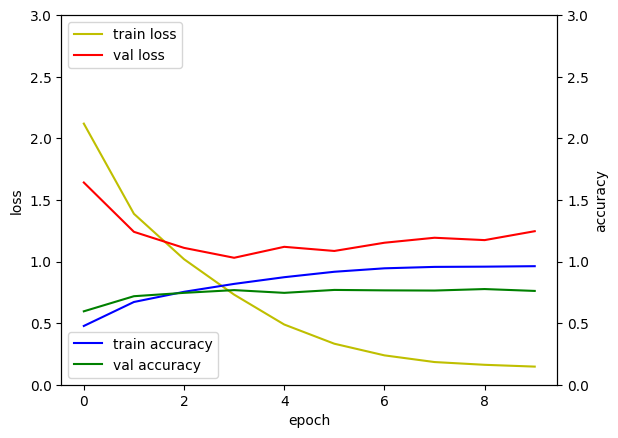

eval :  [1.484194040298462, 0.6856634020805359]


In [ ]:
# 모델 구성 3 : CNN + 완전 연결층만 사용
model3 = Sequential()
model3.add(Embedding(10000, 128, input_length=text_max_words))
model3.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model3.add(GlobalMaxPooling1D())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(46, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model3.summary())

hist = model3.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), verbose=2)

plot_func()

In [ ]:
# 모델 구성 4 : CNN + RNN + 완전 연결층만 사용
from keras.layers import MaxPooling1D
model4 = Sequential()
model4.add(Embedding(10000, 128, input_length=text_max_words))
model4.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model4.add(MaxPooling1D())
model4.add(Dense(256, activation='relu'))
model4.add(Dense(46, activation='softmax'))

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model4.summary())

hist = model4.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), verbose=2)

plot_func()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 128)          1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 118, 256)          98560     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 59, 256)          0         
 )                                                               
                                                                 
 dense_6 (Dense)             (None, 59, 256)           65792     
                                                                 
 dense_7 (Dense)             (None, 59, 46)            11822     
                                                                 
Total params: 1,456,174
Trainable params: 1,456,174
Non-trainable params: 0
____________________________________________

ValueError: ignored